In [3]:
import tropycal.tracks as tracks
import pandas as pd

--> Starting to read in ibtracs data
--> Completed reading in ibtracs data (13.81 seconds)


<GeoAxesSubplot:title={'left':'Hurricane FIONA','right':'14 Sep 2022 – 23 Sep 2022\n115 kt • N/A hPa • 26.3 ACE'}>

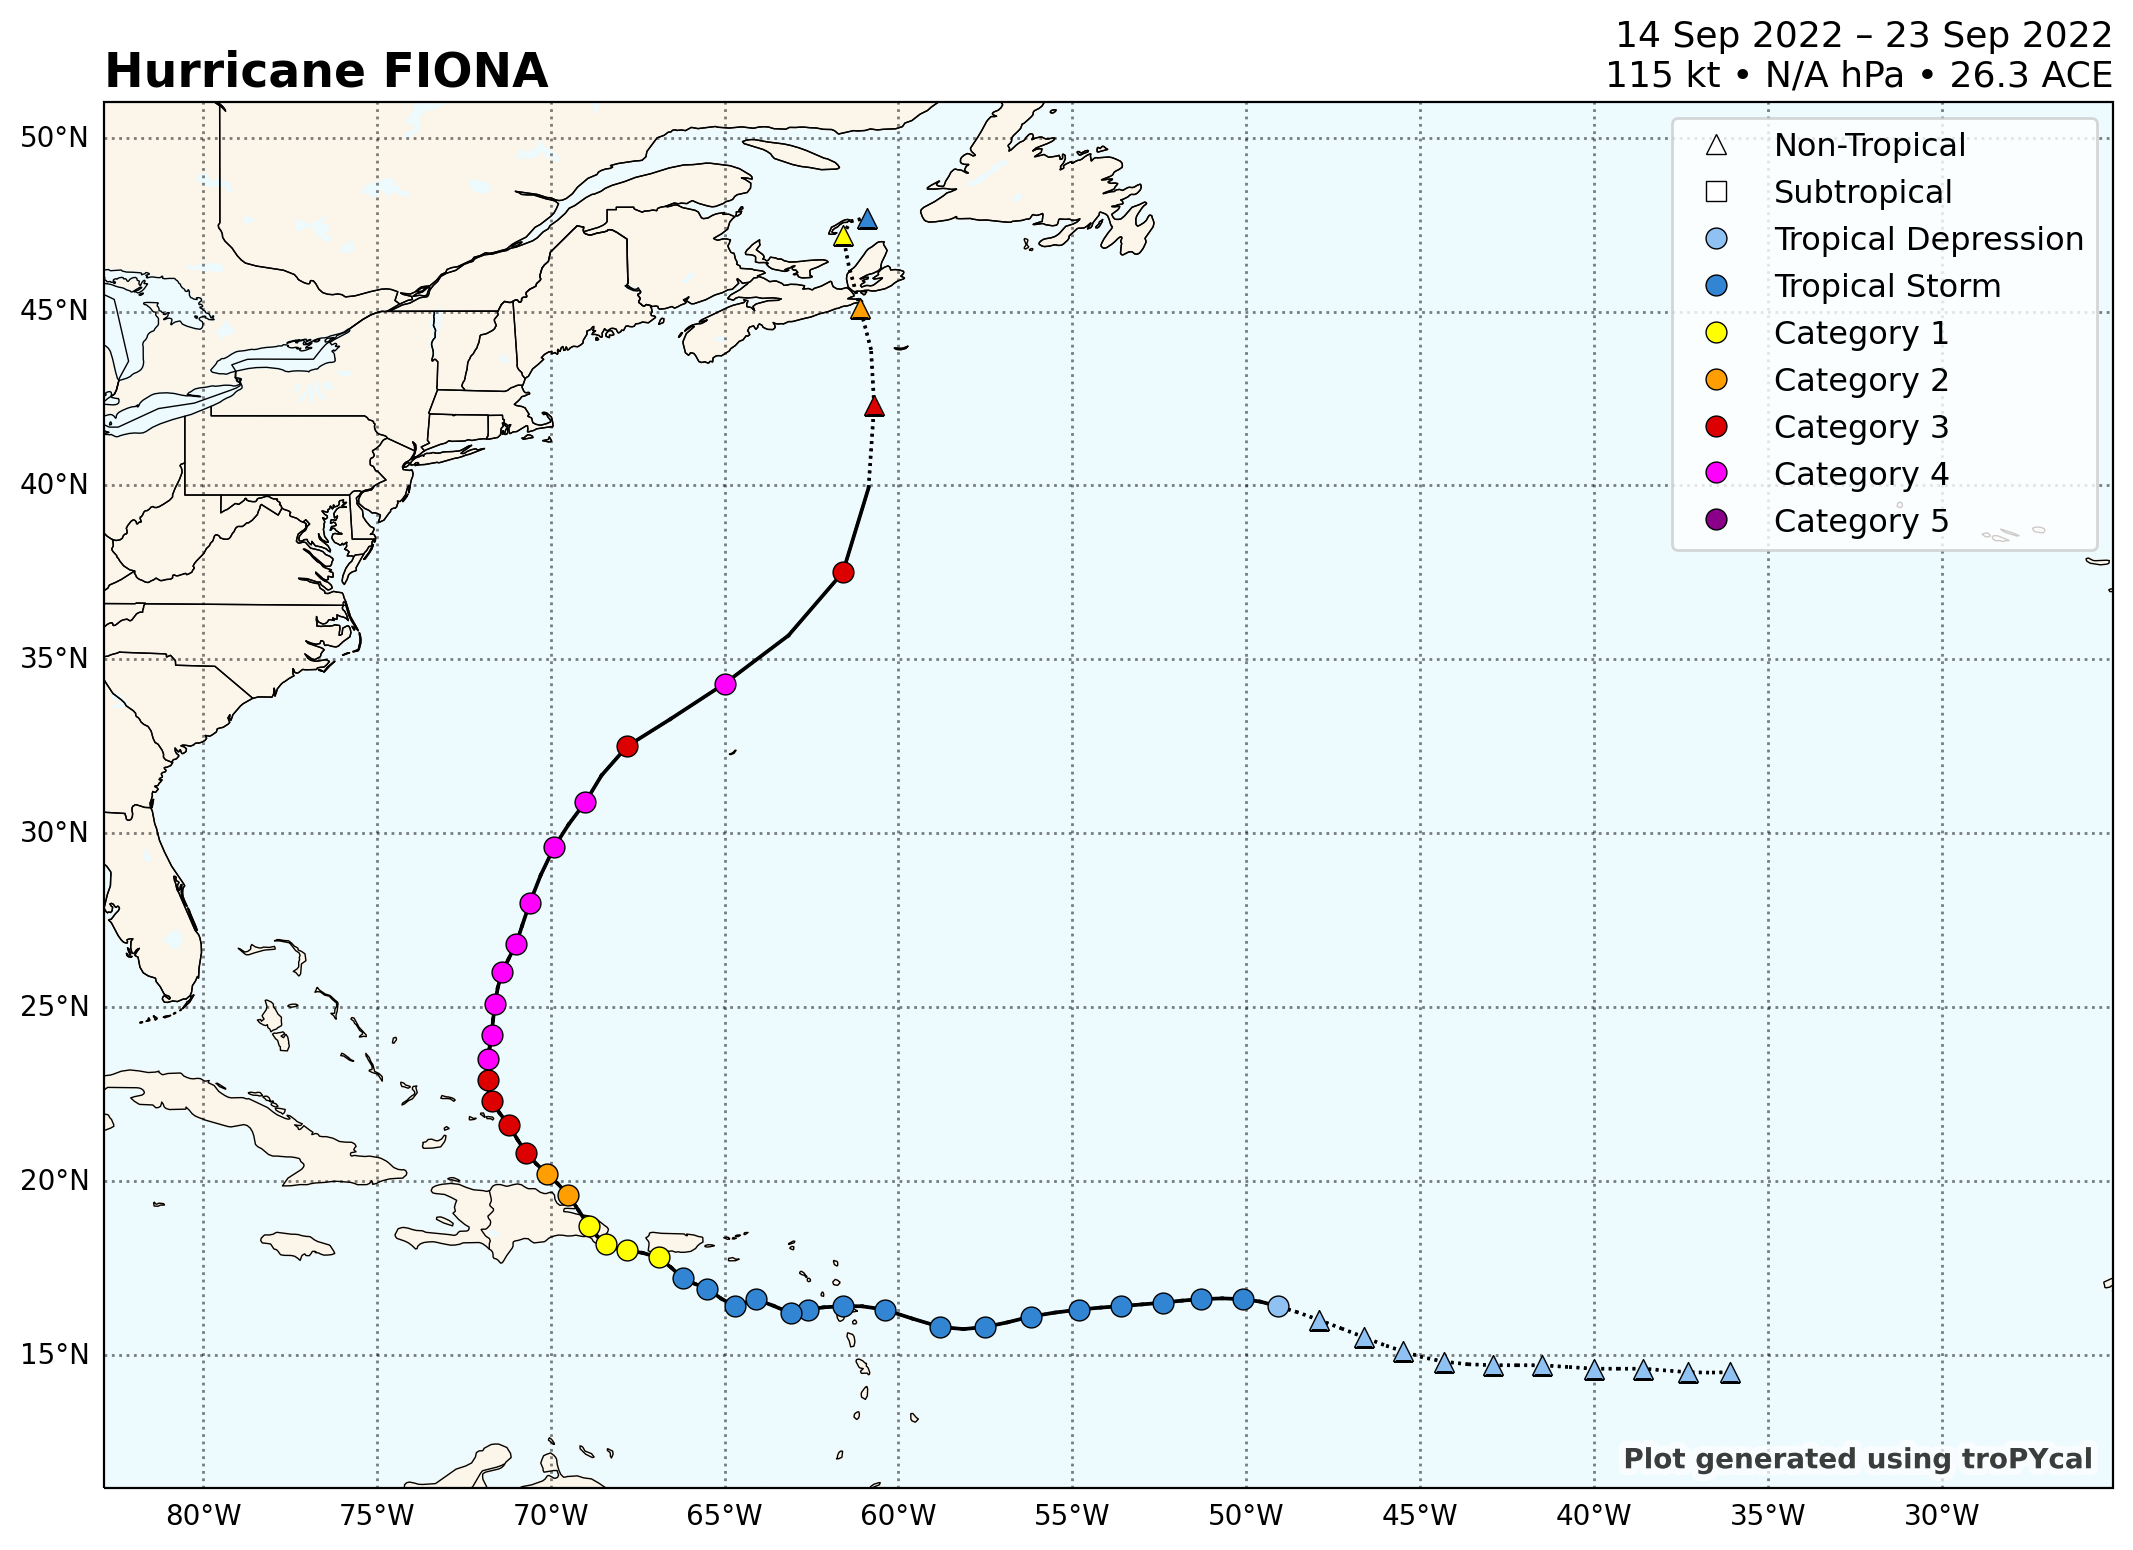

In [1]:


ibtracs = tracks.TrackDataset(basin='north_atlantic',source='ibtracs',ibtracs_mode='jtwc_neumann',catarina=True)
storm = ibtracs.get_storm(('fiona',2022))
storm.plot()

In [2]:
storm

<tropycal.tracks.Storm>
Storm Summary:
    Maximum Wind:      115 knots
    Minimum Pressure:  932 hPa
    Start Date:        1200 UTC 14 September 2022
    End Date:          2100 UTC 23 September 2022

Variables:
    date        (datetime) [2022-09-12 00:00:00 .... 2022-09-24 18:00:00]
    extra_obs   (int64) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [DB .... EX]
    lat         (float64) [14.5 .... 47.7]
    lon         (float64) [-36.1 .... -60.9]
    vmax        (int64) [15 .... 60]
    mslp        (float64) [nan .... 952.0]
    wmo_type    (str) [NR .... ET]
    wmo_lat     (float64) [14.5 .... 47.7]
    wmo_lon     (float64) [-36.1 .... -60.9]
    wmo_vmax    (float64) [nan .... nan]
    wmo_mslp    (float64) [nan .... nan]
    wmo_basin   (str) [north_atlantic .... north_atlantic]

More Information:
    id:              AL072022
    operational_id:  
    name:            FIONA
    year:            2022
    season:          2022
    basin:           north_a

In [4]:
storm_df = storm.to_dataframe()
storm_df.head()

In [19]:
storm_df.head()

,date,extra_obs,special,type,lat,lon,vmax,mslp,wmo_type,wmo_lat,wmo_lon,wmo_vmax,wmo_mslp,wmo_basin
98,2022-09-24 06:00:00,0,,EX,45.1000,-61.1000,85,933.0,ET,45.1000,-61.1000,NaN,NaN,north_atlantic
99,2022-09-24 09:00:00,1,,EX,46.3224,-61.4296,77,936.0,ET,46.2717,-61.4113,NaN,NaN,north_atlantic
100,2022-09-24 12:00:00,0,,EX,47.2000,-61.6000,70,940.0,ET,47.2000,-61.6000,NaN,NaN,north_atlantic
101,2022-09-24 15:00:00,1,,EX,47.5931,-61.3744,65,946.0,ET,47.5931,-61.3744,NaN,NaN,north_atlantic
102,2022-09-24 18:00:00,0,,EX,47.7000,-60.9000,60,952.0,ET,47.7000,-60.9000,NaN,NaN,north_atlantic


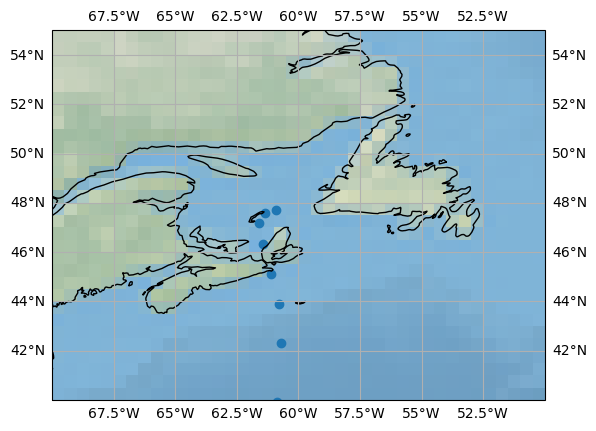

In [21]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ax.set_extent([-70, -50, 40, 55], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)

ax.scatter(storm_df['lon'].tolist(),
           storm_df['lat'].tolist(),
           transform=ccrs.Geodetic())
#ax.scatter([-57.5], [45], transform=ccrs.Geodetic())

plt.show()

In [ ]:
# Appears that the HURDAT2 archive is not updated since 2021 - Fiona not present as of 2023-03-28
storm = hurdat_atl.get_storm(('Fiona',2022))